# Red Wine Quality: Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Q1 : Import red wine data set 

In [2]:
dataset = pd.read_csv('winequality-red.csv', sep=';')
pd.set_option('display.max_columns', None)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Description of Dataset

*source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009*

### Input variables:

1. **fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines

4. **residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. **chlorides**: the amount of salt in the wine

6. **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. **density**: the density of water is close to that of water depending on the percent alcohol and sugar content

9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. **alcohol**: the percent alcohol content of the wine

### Output variable:
1. **quality**: score between 0 and 10

# Q2 : Exploratory Data Analysis

In [3]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


>**The Range of the various variables can be seen above**

In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

>**No columns with null values**

## Histograms

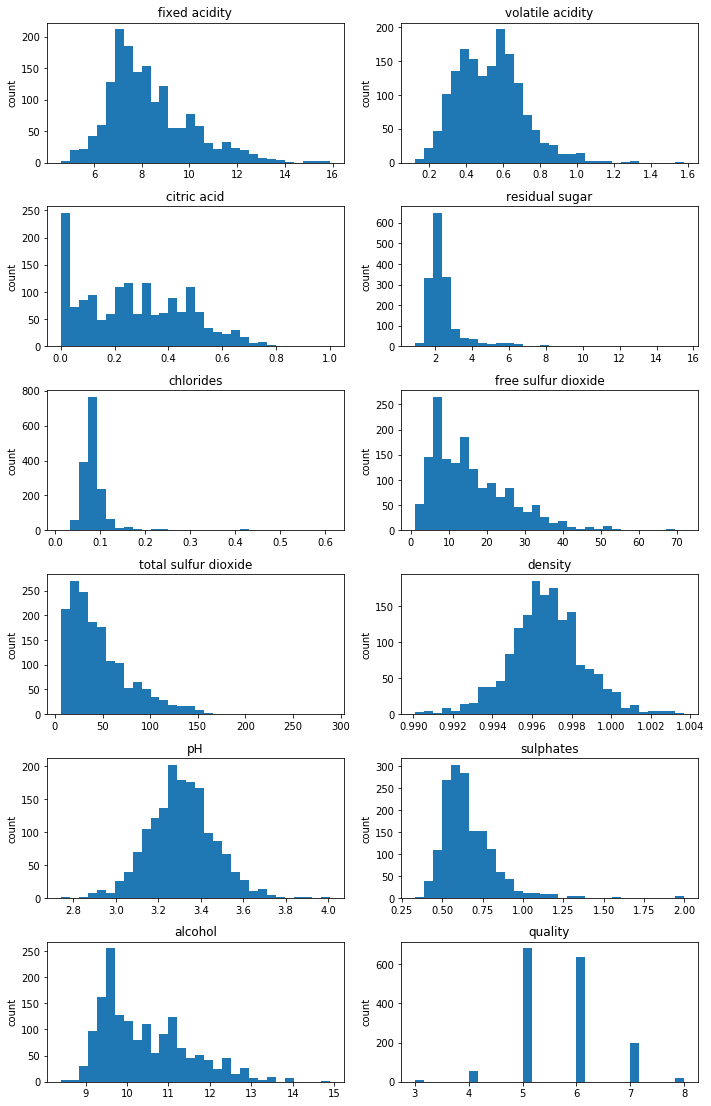

In [5]:
fig = plt.figure(figsize=(10, 17))
for i in range(dataset.shape[1]):
    plt.subplot(6, 2, i + 1)
    plt.hist(dataset[dataset.columns[i]], bins=30, label='no')        # Univariate Analysis
    plt.title(dataset.columns[i])
    plt.ylabel('count')
plt.tight_layout(rect=[0, 0.04, 1, 0.95])

>### Histogram Inferences
><ul>
    <li>Majority of wines have 2-3 grams/litre of residual sugar</li>
    <li>Majority of wines have around 0.1 grams of chloride salts</li>
    <li>Wines have a low concentration of free SO2, total SO2 and sulphates as the quantity decreases with increase in concentration</li>
    <li>Many input variables such as density, pH, etc. are normally distributed</li>
    <li>Majority of wines have a quality score 5-6</li>
</ul>

## Variance

In [6]:
df = pd.DataFrame(columns=['Column', 'Variance'])
i = 0
for heading in dataset.columns:
    var = dataset[heading].var()
    df.loc[i] = [heading, var]
    i += 1
df

,Column,Variance
0,fixed acidity,3.031416
1,volatile acidity,0.032062
2,citric acid,0.037947
3,residual sugar,1.987897
4,chlorides,0.002215
5,free sulfur dioxide,109.414884
6,total sulfur dioxide,1082.102373
7,density,0.000004
8,pH,0.023835
9,sulphates,0.028733


>Total sulphur dioxide and free sulphur dioxide have a **very high** variance

## Pearson correlation coefficient matrix

<h1> $\rho$ <sub>x, y</sub> = $\frac{cov(x, y)}{\sigma x \sigma y}$ </h1>

In [7]:
pCorr_mat = dataset.corr(method='pearson')   # find pearson correlation coeff for each pair (X, Y) variables and form a matrix
pCorr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Heatmap of Pearson correlation coefficient matrix

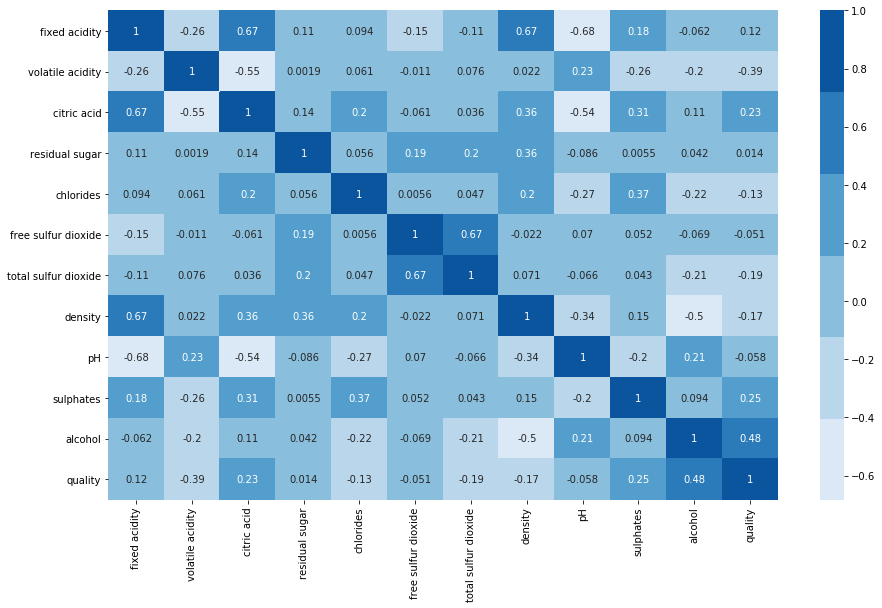

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
sns.heatmap(pCorr_mat, annot=True, cmap=sns.color_palette("Blues"), ax=ax)   # bivariate Analysis
plt.show()

>### Heatmap Inferences
><ul>
    <li>Fixed acidity and Citric acid have high positive correlation</li>
    <li>Fixed acidity and Density have high positive correlation</li>
    <li>Fixed acidity and pH have high negative correlation</li>
    <li>Free Sulphur Dioxide and Total Sulphur Dioxide have high positive correlation</li>
    <li>Alcohol variable is the most correlated variable in determining wine quality</li>
</ul>

## Feature Density Plots

>**Measurement of Central Tendancy**
><ol>
    <li>Mean</li>
    <li>Median</li>
    <li>Mode</li>
</ol>

>**Measurement of Spread of data**
><ol>
    <li>Range (Max - Min)</li>
    <li>Standard deviation from mean (mean +/- std)</li>
    <li>Interquartile Range (75th percentile - 25th percentile)</li>
</ol>

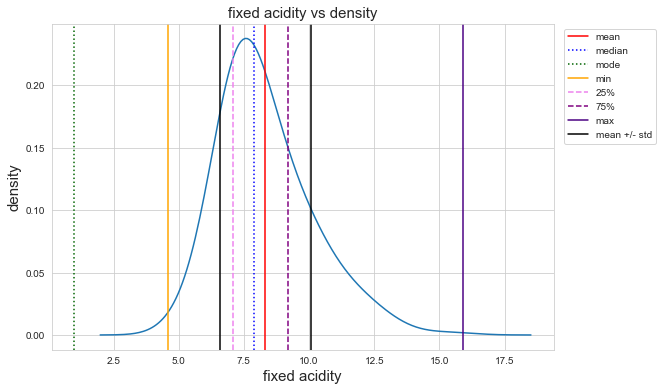

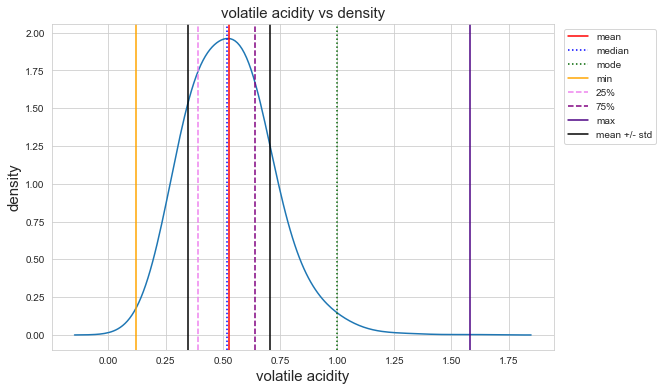

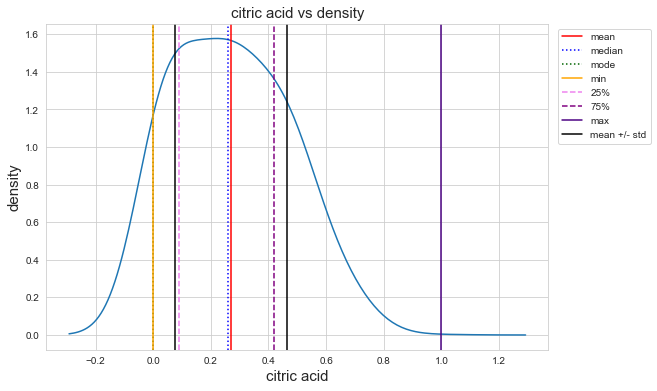

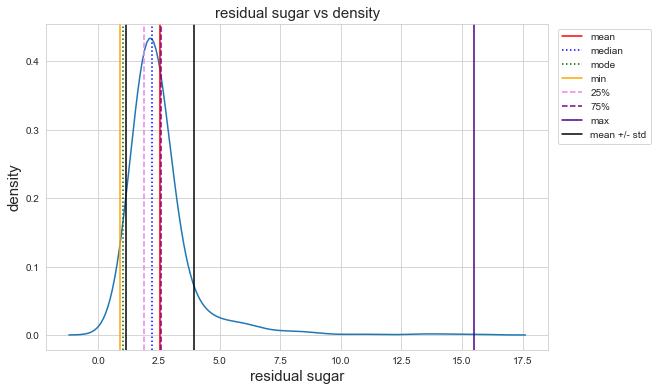

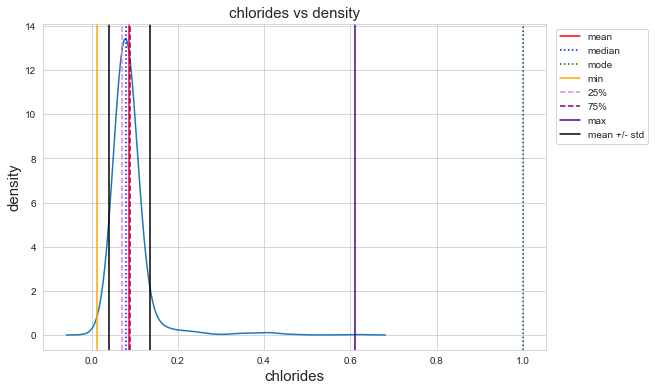

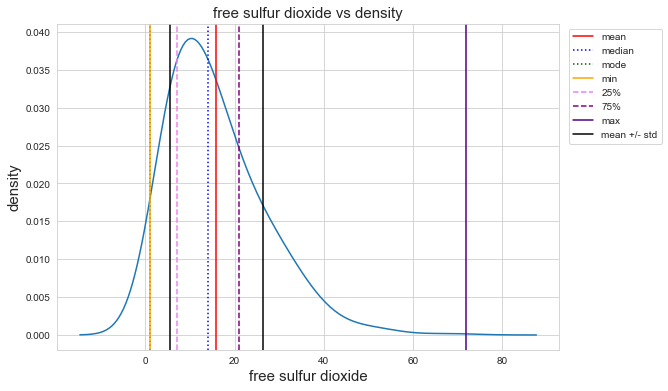

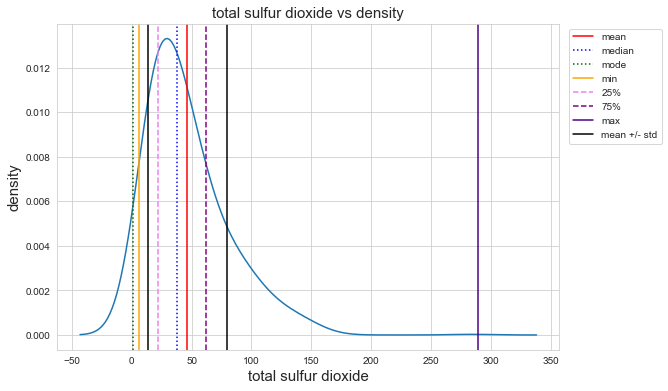

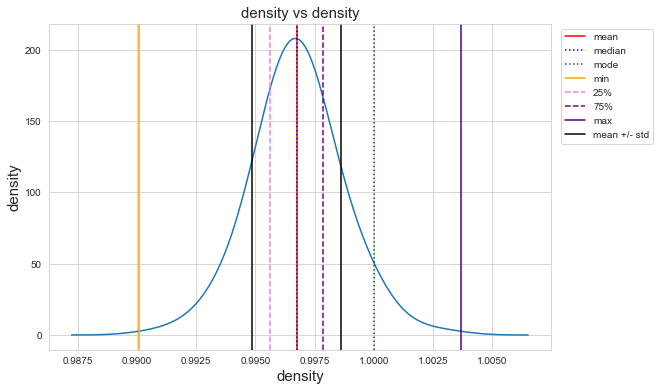

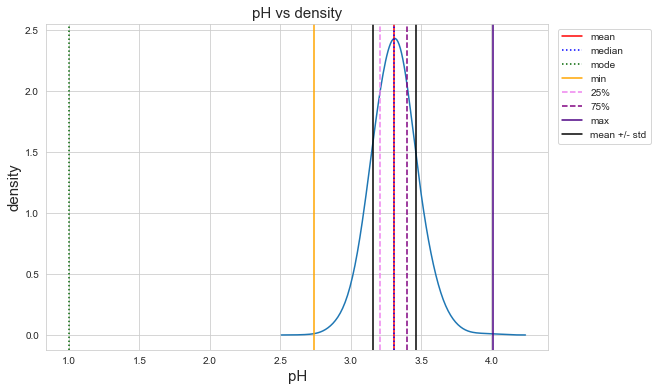

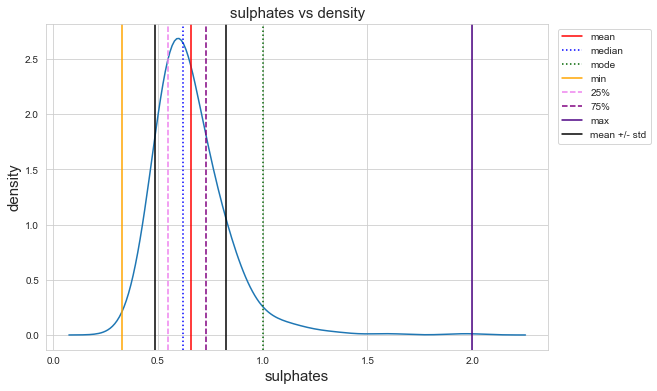

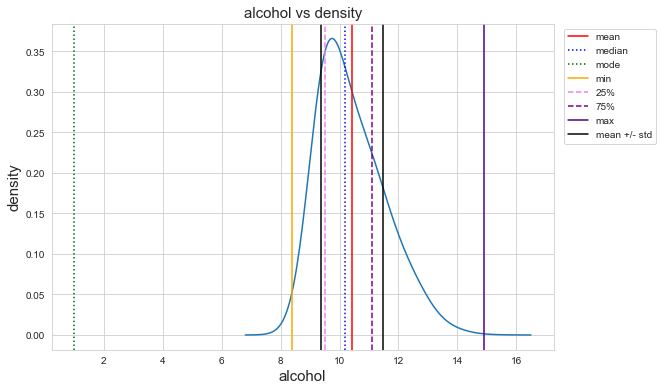

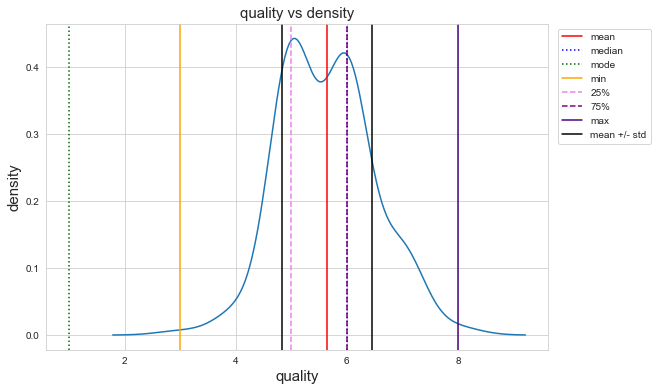

In [9]:
for i in range(dataset.shape[1]):
    
    fig = plt.figure(figsize=(9, 6))
    sns.set_style('whitegrid')
    sns.kdeplot(dataset[dataset.columns[i]], bw=0.5)                                                      # Univariate Analysis
    
    #Central Tendancy
    
    plt.axvline(dataset[dataset.columns[i]].mean(), color='red', linestyle='-', label='mean')                  # mean
    plt.axvline(dataset[dataset.columns[i]].median(), color='blue', linestyle=':', label='median')             # median
    plt.axvline(dataset[dataset.columns[i]].mode().any(), color='darkgreen', linestyle=':', label='mode')      # mode
    
    #Spread
    
    plt.axvline(dataset[dataset.columns[i]].min(), color='orange', linestyle='-', label='min')                 #min
    plt.axvline(dataset[dataset.columns[i]].describe()['25%'], color='violet', linestyle='--', label='25%')    # 25th percentile
    plt.axvline(dataset[dataset.columns[i]].describe()['75%'], color='purple', linestyle='--', label='75%')    # 75th percentile
    plt.axvline(dataset[dataset.columns[i]].max(), color='indigo', linestyle='-', label='max')                 # max
    
    mean = dataset[dataset.columns[i]].mean()
    plt.axvline(mean + dataset[dataset.columns[i]].std(), color='black', linestyle='-', label='mean +/- std')  # mean + std
    plt.axvline(mean - dataset[dataset.columns[i]].std(), color='black', linestyle='-')                        # mean - std
    
    plt.title(dataset.columns[i] + ' vs density', fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.xlabel(dataset.columns[i], fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.ylabel('density', fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.legend(loc="upper left", bbox_to_anchor=(1.01,1))
    plt.show()

>**The spread of data and its central tendancy can be observed in the above density plots**

## Density plots and Boxplots grouped by 'quality' 

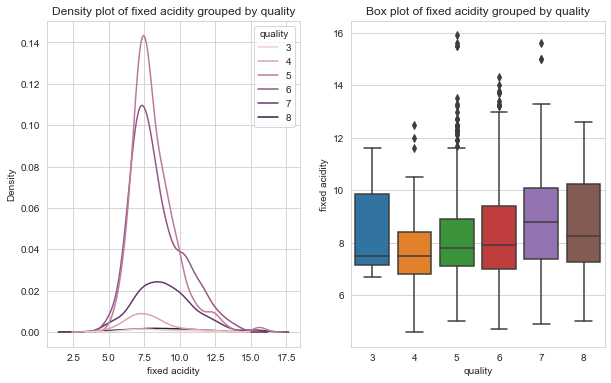

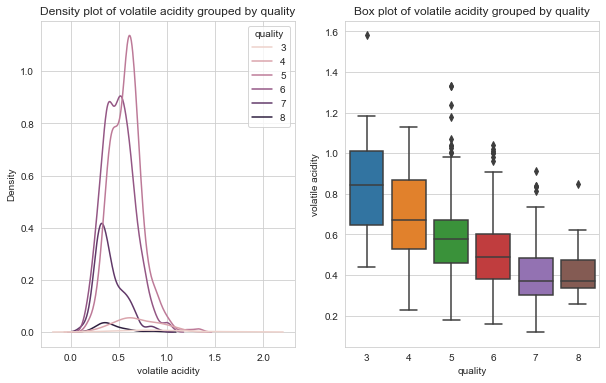

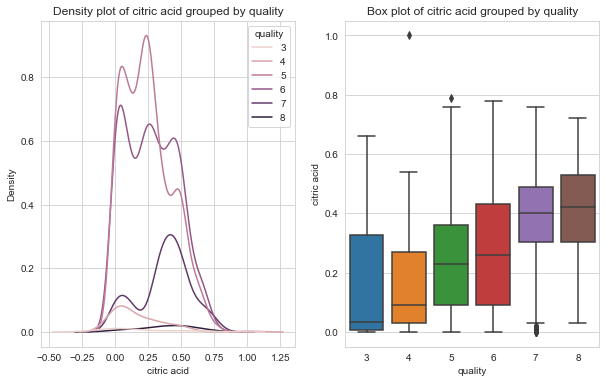

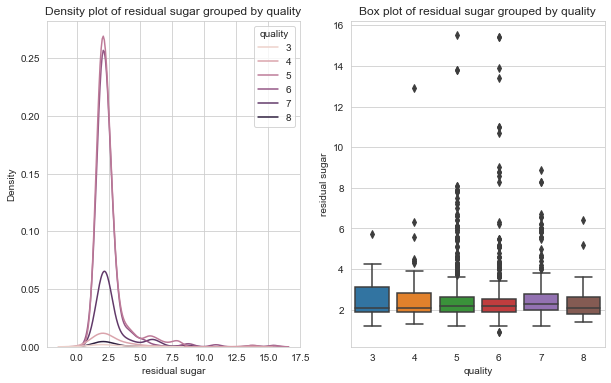

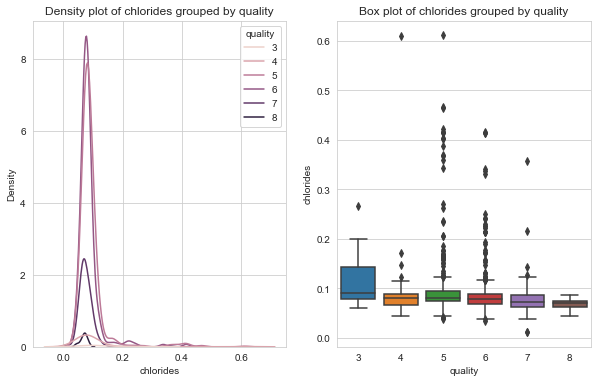

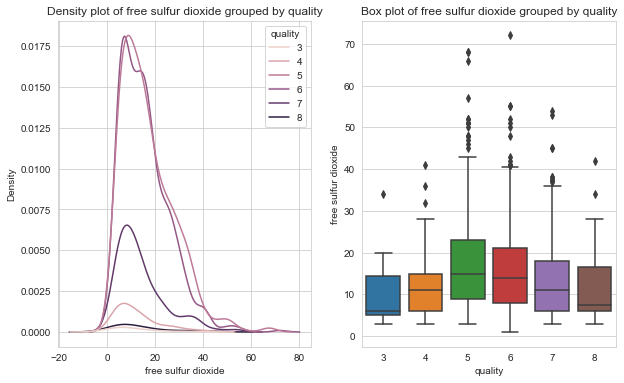

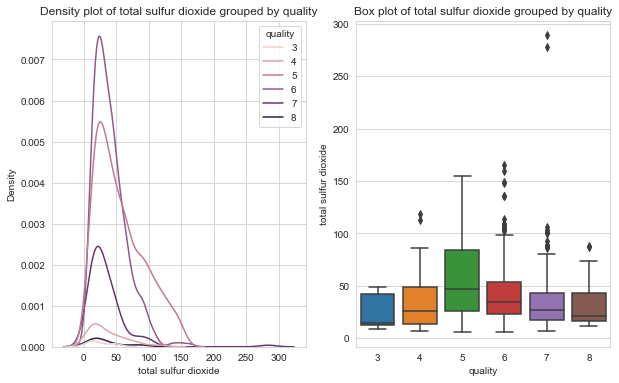

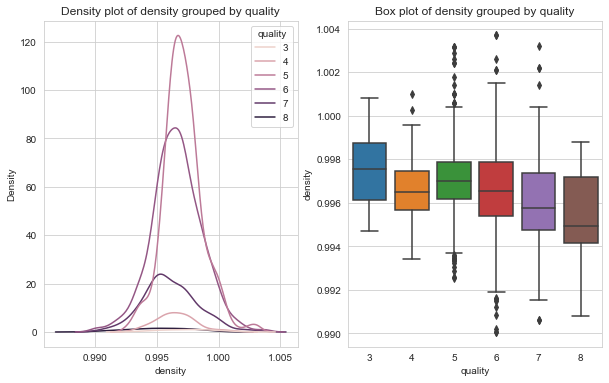

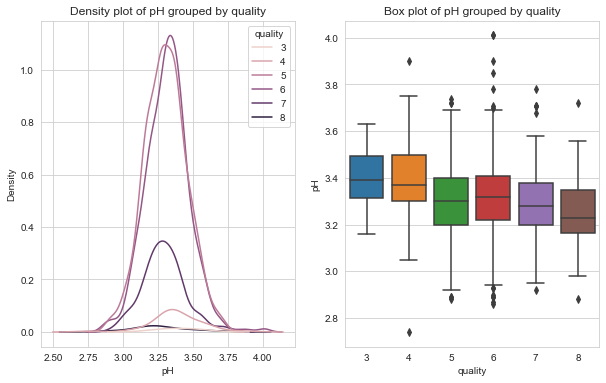

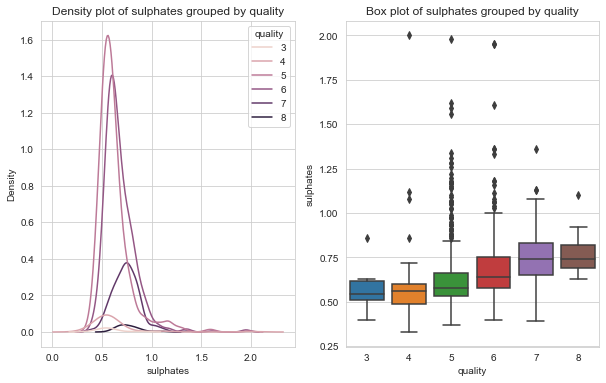

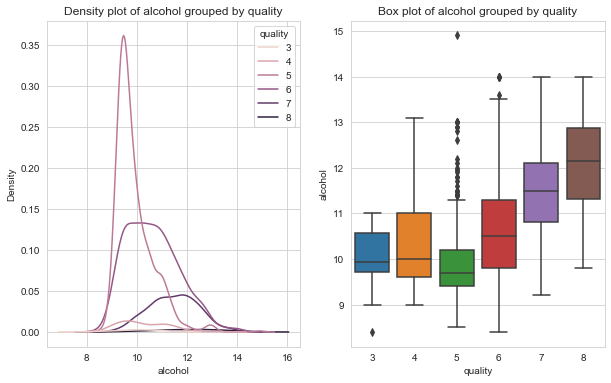

In [10]:
for i in range(dataset.shape[1]):
    if dataset.columns[i] != 'quality':
        fig, ax = plt.subplots(figsize=(10,6), ncols=2)                                          # bivariate analysis
        sns.kdeplot(dataset[dataset.columns[i]], hue=dataset['quality'], ax=ax[0])
        sns.boxplot(x = dataset['quality'], y = dataset[dataset.columns[i]], ax=ax[1])
        ax[0].title.set_text('Density plot of ' + dataset.columns[i] + ' grouped by quality')
        ax[1].title.set_text('Box plot of ' + dataset.columns[i] + ' grouped by quality')
        
        plt.show()

>**IQR**<br>
The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles<br>
IQR = Q3 − Q1

In [11]:
df = pd.DataFrame(columns=['Column', '25%', '75%', 'IQR'])
i = 0
for heading in dataset.columns:
    Q1 = dataset[heading].quantile(0.25)                       # 1st Quartile 
    Q3 = dataset[heading].quantile(0.75)                       # 3rd Quartile
    IQR = Q3 - Q1
    df.loc[i] = [heading, Q1, Q3, IQR]
    i += 1
df

,Column,25%,75%,IQR
0,fixed acidity,7.1000,9.200000,2.100000
1,volatile acidity,0.3900,0.640000,0.250000
2,citric acid,0.0900,0.420000,0.330000
3,residual sugar,1.9000,2.600000,0.700000
4,chlorides,0.0700,0.090000,0.020000
5,free sulfur dioxide,7.0000,21.000000,14.000000
6,total sulfur dioxide,22.0000,62.000000,40.000000
7,density,0.9956,0.997835,0.002235
8,pH,3.2100,3.400000,0.190000
9,sulphates,0.5500,0.730000,0.180000


## Feature Selection

>We are going to use a **wrapper method** technique: **Backward Elimination**

In [12]:
import statsmodels.api as sm

In [13]:
X = dataset.drop('quality', axis=1)                                # Seperating independent variables and target variable
y = dataset['quality']

In [14]:
pmax = 1
cols = list(X.columns)                                             # initially fit model with all features 
significance_level = 0.05                                          # choose significance level

while (len(cols)>0):
    p = [] 
    features = X[cols]
    features = sm.add_constant(features)
    model = sm.OLS(y, features).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = p.max()                                                  # feature with highest p value
    feature_with_pmax = p.idxmax()
    if pmax>significance_level:                                     # remove feature if highest p-value > significance level
        cols.remove(feature_with_pmax)
    else:                                                           # else end process
        break

selected_features_BE = cols 
selected_features_BE.append('quality')                              # target variable
selected_features_BE

['volatile acidity',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [15]:
relevant = dataset[selected_features_BE]
relevant.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


### Seperating independent variables and target variable for complete and relevant datasets

In [16]:
X = dataset.drop('quality', axis=1)
y = dataset['quality']

X_rel = relevant.drop('quality', axis=1)
y_rel = relevant['quality']

In [17]:
#import required libraries
import time
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Split data into train and test data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rel, y_rel, test_size=.2, random_state=42)

#reset index for each of these splits

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Xr_train.reset_index(drop=True, inplace=True)
yr_train.reset_index(drop=True, inplace=True)
Xr_test.reset_index(drop=True, inplace=True)
yr_test.reset_index(drop=True, inplace=True)

# Q3 : K-nearest neighbour classifier

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                  # Certain models(Eg. KNN) require scaled input for better performance

X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

Xr_sc_train = scaler.fit_transform(Xr_train)
Xr_sc_test = scaler.transform(Xr_test)

In [20]:
from collections import Counter                            # Helper libraries and functions for Custom_KNN class

def euclidean_dist(X1, X2):
    return np.sqrt(np.sum((X1-X2)**2))

In [21]:
class Custom_KNN():
    
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _kneighbors(self, x):
        distances = []                                     # List of distances of all neighbors from test point
        for i in range(self.X_train.shape[0]): 
            d = euclidean_dist(x, self.X_train[i])
            distances.append(d)

        k_indices = np.argsort(distances)[:self.k]         # first k sorted indices of sorted distances
        kN_labels = []
        for i in k_indices:
            kN_labels.append(self.y_train[i])
        
        target = Counter(kN_labels).most_common(1)         # Most common label from first k sorted labels
        return target[0][0]                                # target is of form: list(tuple(<value>, <count>)) and 'value' of 
                                                           # first tuple is returned
        
    def predict(self, X):
        y_predict = []
        for i in range(X.shape[0]):
            target = self._kneighbors(X[i])
            y_predict.append(target)
        return np.array(y_predict)

In [22]:
# for all features

start = time.time()
classifier = Custom_KNN()
classifier.fit(X_sc_train, y_train)
y_pred = classifier.predict(X_sc_test)
end = time.time()

time_KNN_1 = end - start
precision_KNN_1 = precision_score(y_test, y_pred, average = "micro")
recall_KNN_1 = recall_score(y_test, y_pred, average = "micro")
f1_KNN_1 = f1_score(y_test, y_pred, average = "micro")
accuracy_KNN_1 = accuracy_score(y_test, y_pred)

print('For all features: ')
print('CPU Time: ', time_KNN_1, 'seconds')
print('Precision: ', precision_KNN_1)
print('Recall: ', recall_KNN_1)
print('F1 Score: ', f1_KNN_1)
print('Classification Accuracy', accuracy_KNN_1)

For all features: 
CPU Time:  2.8683266639709473 seconds
Precision:  0.571875
Recall:  0.571875
F1 Score:  0.571875
Classification Accuracy 0.571875


In [23]:
# for relevant features

start = time.time()
classifier = Custom_KNN()
classifier.fit(Xr_sc_train, yr_train)
yr_pred = classifier.predict(Xr_sc_test)
end = time.time()

time_KNN_2 = end - start
precision_KNN_2 = precision_score(yr_test, yr_pred, average = "micro")
recall_KNN_2 = recall_score(yr_test, yr_pred, average = "micro")
f1_KNN_2 = f1_score(yr_test, yr_pred, average = "micro")
accuracy_KNN_2 = accuracy_score(yr_test, yr_pred)

print('For relevant features: ')
print('CPU Time: ', time_KNN_2, 'seconds')
print('Precision: ', precision_KNN_2)
print('Recall: ', recall_KNN_2)
print('F1 Score: ', f1_KNN_2)
print('Classification Accuracy', accuracy_KNN_2)

For relevant features: 
CPU Time:  3.0857431888580322 seconds
Precision:  0.590625
Recall:  0.590625
F1 Score:  0.590625
Classification Accuracy 0.590625


# Q3 : Naive Bayes classifier

>Since most of the data is continuous and normally distributed we can use Gaussian Naive Bayes classifier

In [24]:
from sklearn.naive_bayes import GaussianNB 

In [25]:
# for all features

start = time.time()
classifier = GaussianNB() 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
end = time.time()

time_NB_1 = end - start
precision_NB_1 = precision_score(y_test, y_pred, average = "micro")
recall_NB_1 = recall_score(y_test, y_pred, average = "micro")
f1_NB_1 = f1_score(y_test, y_pred, average = "micro")
accuracy_NB_1 = accuracy_score(y_test, y_pred)

print('For all features: ')
print('CPU Time: ', time_NB_1, 'seconds')
print('Precision: ', precision_NB_1)
print('Recall: ', recall_NB_1)
print('F1 Score: ', f1_NB_1)
print('Classification Accuracy', accuracy_NB_1)

For all features: 
CPU Time:  0.00396418571472168 seconds
Precision:  0.55
Recall:  0.55
F1 Score:  0.55
Classification Accuracy 0.55


In [26]:
# for relevant features

start = time.time()
classifier = GaussianNB() 
classifier.fit(Xr_train, yr_train) 
yr_pred = classifier.predict(Xr_test)
end = time.time()

time_NB_2 = end - start
precision_NB_2 = precision_score(yr_test, yr_pred, average = "micro")
recall_NB_2 = recall_score(yr_test, yr_pred, average = "micro")
f1_NB_2 = f1_score(yr_test, yr_pred, average = "micro")
accuracy_NB_2 = accuracy_score(yr_test, yr_pred)

print('For relevant features: ')
print('CPU Time: ', time_NB_2, 'seconds')
print('Precision: ', precision_NB_2)
print('Recall: ', recall_NB_2)
print('F1 Score: ', f1_NB_2)
print('Classification Accuracy', accuracy_NB_2)

For relevant features: 
CPU Time:  0.003954172134399414 seconds
Precision:  0.56875
Recall:  0.56875
F1 Score:  0.56875
Classification Accuracy 0.56875


## Tablular Comparison

In [27]:
table = [['KNN for all features', precision_KNN_1, recall_KNN_1, f1_KNN_1, accuracy_KNN_1, time_KNN_1],
         ['KNN for relevant features', precision_KNN_2, recall_KNN_2, f1_KNN_2, accuracy_KNN_2, time_KNN_2],
         ['Naive Bayes for all features', precision_NB_1, recall_NB_1, f1_NB_1, accuracy_NB_1, time_NB_1],
         ['Naive Bayes for relevant features', precision_NB_2, recall_NB_2, f1_NB_2, accuracy_NB_2, time_NB_2]
        ]
df = pd.DataFrame(table, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Classification Accuracy', 'CPU Time (in seconds)'])
df

,Model,Precision,Recall,F1 Score,Classification Accuracy,CPU Time (in seconds)
0,KNN for all features,0.571875,0.571875,0.571875,0.571875,2.868327
1,KNN for relevant features,0.590625,0.590625,0.590625,0.590625,3.085743
2,Naive Bayes for all features,0.550000,0.550000,0.550000,0.550000,0.003964
3,Naive Bayes for relevant features,0.568750,0.568750,0.568750,0.568750,0.003954


# Q4 : K-Means Clustering

In [28]:
scaler = StandardScaler()                              # Certain models(Eg. K-Means) require scaled input for better performance

X_sc = scaler.fit_transform(X)
Xr_sc = scaler.fit_transform(X_rel)

In [29]:
class Custom_KMeans():
    
    def __init__(self, k=5, max_iters=100):
        self.k = k
        self.max_iters = max_iters

        self.clusters = [[] for _ in range(self.k)]            # initialize list of sample indices for each cluster
        self.centroids = []                                    # initialize centroids for each cluster
        
    def predict(self, X):
        self.X = X
        self.n_X, self.n_y = X.shape
         
        init_indices = np.random.choice(self.n_X, self.k, replace=False)    # initialize
        self.centroids = []
        for i in init_indices:
            self.centroids.append(self.X[i])

        for _ in range(self.max_iters):                                     # Optimize clusters
            self.clusters = self._create_clusters(self.centroids)           # Assign samples to nearest centroids

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)             # update centroids
            
            if self._check_convergence(centroids_old, self.centroids):      # check if the centroids updated
                break                                                       # else it has converged and process terminates 
        
        return self._get_labels(self.clusters), self.centroids
    
    #Helper functions
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        
        for i, sample in enumerate(self.X):
            centroid_index = self._nearest_centroid(sample, centroids)
            clusters[centroid_index].append(i)                              # Sample index is appended to the respective cluster
        return clusters
    
    def _nearest_centroid(self, sample, centroids):
        distances = []
        for centroid in  centroids:
            distances.append(euclidean_dist(sample, centroid))
        nearest_cluster_index = np.argmin(distances)                              # nearest cluster index is returned
        return nearest_cluster_index
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_y))
        for cluster_index, cluster in enumerate(clusters):                        # assign mean value of a cluster to centroid
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_index] = cluster_mean
        return centroids
    
    def _check_convergence(self, centroids_old, centroids):
        distances = []
        for i in range(self.k):
            distances.append(euclidean_dist(centroids_old[i], centroids[i]))
        return sum(distances) == 0                                                #check if the centroids updated
    
    def _get_labels(self, clusters):
        labels = np.empty(self.n_X)

        for cluster_index, cluster in enumerate(clusters):
            for index in cluster:
                labels[index] = cluster_index                                     #label each sample with its cluster index
        return labels 

In [30]:
# for all features

start = time.time()
classifier = Custom_KMeans(k = 6, max_iters=300)            # 6 clusters are created because 'quality' ranges from 3-8
y_pred_1, centroids_1 = classifier.predict(X_sc)
end = time.time()

time_KM_1 = end - start

print('For all features: ')
print('CPU Time: ', time_KM_1, 'seconds')

For all features: 
CPU Time:  0.7752232551574707 seconds


In [31]:
# for relevant features

start = time.time()
classifier = Custom_KMeans(k = 6, max_iters=300)            # 6 clusters are created because 'quality' ranges from 3-8
y_pred_2, centroids_2 = classifier.predict(Xr_sc)
end = time.time()

time_KM_2 = end - start

print('For relevant features: ')
print('CPU Time: ', time_KM_2, 'seconds')

For relevant features: 
CPU Time:  1.8121905326843262 seconds


## Plotting K-Means Clusters
> A 2D plot with first 2 features has been shown below for easy visualization of the clusters

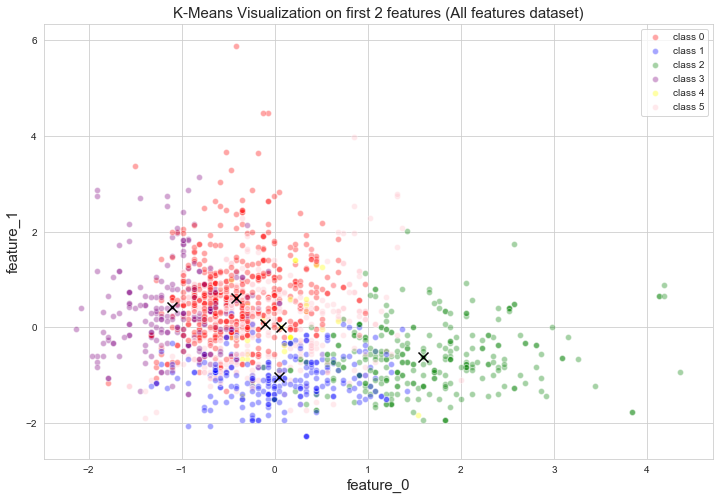

In [32]:
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink']

plt.xlabel('feature_0', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.ylabel('feature_1', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.title('K-Means Visualization on first 2 features (All features dataset)', fontdict={'fontsize': 15, 'fontweight' : 2})

for i in range(X_sc.shape[0]):                                  #Plotting all points w.r.t. feature_0 and feature_1
    plt.scatter(X_sc[i][0], X_sc[i][1], 
                color = colors[int(y_pred_1[i])], 
                marker = 'o', 
                alpha=0.35, 
                edgecolors='white',
               )
    
for i in range(centroids_1.shape[0]):                           #labelling legend for each class
    plt.scatter(centroids_1[i][0], centroids_1[i][1], 
                color = colors[i],
                marker = 'o', 
                alpha=0.35, 
                edgecolors='white',
                label = 'class ' + str(i)
               )

for i in range(centroids_1.shape[0]):                           #Plotting all centroids w.r.t. feature_0 and feature_1
    plt.scatter(centroids_1[i][0], centroids_1[i][1], 
                color = 'black', 
                marker = 'x', 
                alpha=1, 
                edgecolors='black', 
                s=100,
               )
    
plt.legend()
    
plt.show()

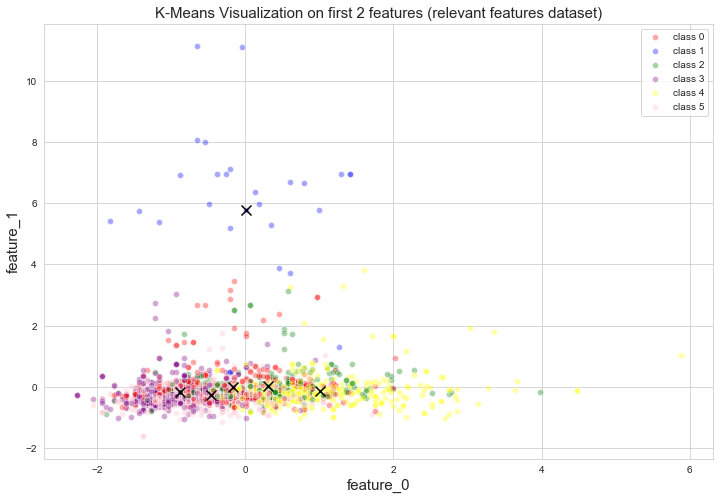

In [33]:
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink']

plt.xlabel('feature_0', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.ylabel('feature_1', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.title('K-Means Visualization on first 2 features (relevant features dataset)', fontdict={'fontsize': 15, 'fontweight' : 2})

for i in range(Xr_sc.shape[0]):                                  #Plotting all points w.r.t. feature_0 and feature_1
    plt.scatter(Xr_sc[i][0], Xr_sc[i][1], 
                color = colors[int(y_pred_2[i])], 
                marker = 'o', 
                alpha=0.35, 
                edgecolors='white',
               )
    
for i in range(centroids_2.shape[0]):                           #labelling legend for each class
    plt.scatter(centroids_2[i][0], centroids_2[i][1], 
                color = colors[i],
                marker = 'o', 
                alpha=0.35, 
                edgecolors='white',
                label = 'class ' + str(i)
               )

for i in range(centroids_2.shape[0]):                           #Plotting all centroids w.r.t. feature_0 and feature_1
    plt.scatter(centroids_2[i][0], centroids_2[i][1], 
                color = 'black', 
                marker = 'x', 
                alpha=1, 
                edgecolors='black', 
                s=100,
               )
    
plt.legend()
    
plt.show()

## Tablular Comparison

In [34]:
table = [['K-Means for all features', time_KM_1],
          ['K-Means for relevant features', time_KM_2]]
df = pd.DataFrame(table, columns=['Model', 'CPU Time'])
df

,Model,CPU Time
0,K-Means for all features,0.775223
1,K-Means for relevant features,1.812191
